# Modeling - Logistic Regression

In [18]:
# Importing the necessary packages 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

In [19]:
# Loading the dataset 

apple_df = pd.read_csv('../clean_apple_stocks.csv')

In [20]:
apple_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
0,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
1,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
2,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
3,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
4,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0


In [21]:
apple_df.shape

(2942, 9)

In [22]:
# Applying Logistic Regression 

# Assigning Variables 

X = apple_df.drop(['Adj Closing Price Change', 'Date'], axis= 1)
y = apple_df['Adj Closing Price Change']

In [23]:
# Split into train/test 

# Import the package 

from sklearn.model_selection import train_test_split

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [24]:
# Viewing the shape of our train/test split 

#print(f"The shape of our train set is {}")

In [25]:
# Scaling the data 

# Import the package 

from sklearn.preprocessing import StandardScaler

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Logistic Regression

#Importing the package 
from sklearn.linear_model import LogisticRegression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.6642380085003036
Validation score 0.6359223300970874
Test score 0.6636466591166478


---

Based on EDA 2 

In [27]:
# Loading our clean dataset from the EDA - 2 Notebook 

stocks_df = pd.read_csv('../clean_data.csv')

In [28]:
# Viewing our dataframe 

stocks_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
0,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
1,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
2,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
3,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
4,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0
5,7.471071,7.491786,7.372143,7.418571,6.369709,594459600,6.442997,0
6,7.423929,7.533214,7.289286,7.523214,6.459555,605892000,6.369709,1
7,7.503929,7.516429,7.465000,7.479643,6.422143,432894000,6.459555,0
8,7.533214,7.557143,7.352500,7.354643,6.314816,594067600,6.422143,0
9,7.440357,7.685357,7.401429,7.680000,6.594175,730007600,6.314816,1


In [29]:
# Shape of our dataframe 



In [30]:
# Applying Logistic Regression 

# Assigning Variables 

X = stocks_df.drop(['Open', 'Adj Closing Price Change', 'High', 'Low', 'Close'], axis= 1)
y = stocks_df['Adj Closing Price Change']

In [31]:
# Split into train/test 

# Import the package 

from sklearn.model_selection import train_test_split

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [32]:
# Scaling the data 

# Import the package 

from sklearn.preprocessing import StandardScaler

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Logistic Regression

#Importing the package 
from sklearn.linear_model import LogisticRegression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.8395293808334429
Validation score 0.8384382805310898
Test score 0.8345848056537103


In [34]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test_scaled)

###  = print my confusion matrix 

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     38770
           1       0.76      1.00      0.86     42734

    accuracy                           0.83     81504
   macro avg       0.88      0.83      0.83     81504
weighted avg       0.87      0.83      0.83     81504



### After down-sampling:

In [105]:
# Loading our balanced dataset from the EDA - 2 Notebook 

balanced_df = pd.read_csv('../sample_balanced_data.csv')

In [106]:
balanced_df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
0,99.500000,100.570000,98.389999,98.580002,89.595734,2450000,90.559128,0
1,47.160000,47.220001,46.480000,46.970001,44.740360,26747200,45.073746,0
2,434.312103,436.523804,430.013214,433.270996,433.270996,6056416,438.820190,0
3,24.070000,24.200001,23.740000,23.930000,18.786953,65512400,18.810499,0
4,58.049999,58.220001,57.169998,57.860001,53.495506,2572100,53.486259,1


In [107]:
balanced_df['Adj Closing Price Change'].value_counts()

0    5010
1    4990
Name: Adj Closing Price Change, dtype: int64

In [108]:
# Applying Logistic Regression 

# Assigning Variables 

X_balanced = balanced_df.drop(['Open', 'Adj Closing Price Change', 'High', 'Low', 'Close'], axis= 1)
y_balanced = balanced_df['Adj Closing Price Change']

In [109]:
# Split into train/test 

# Import the package 

from sklearn.model_selection import train_test_split

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [112]:
# Scaling the data 

# Import the package 

from sklearn.preprocessing import StandardScaler

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Logistic Regression

#Importing the package 
from sklearn.linear_model import LogisticRegression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.7385714285714285
Validation score 0.7428571428571429
Test score 0.72


In [114]:
y_pred = logreg.predict(X_test_scaled)


In [115]:
# Confusion Matrix 

#Import the confusion matrix libraries

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,1456,47
True Positive,793,704


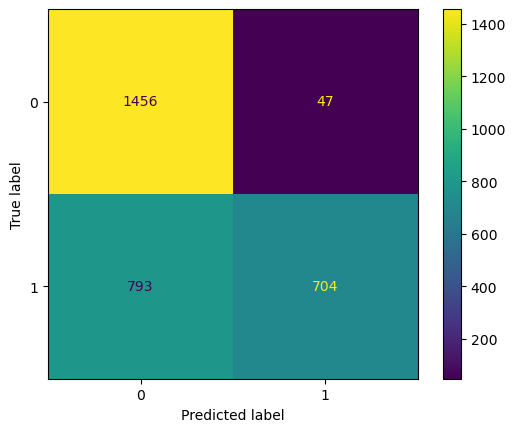

In [116]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

In [117]:
# Classification Report 

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      1503
           1       0.94      0.47      0.63      1497

    accuracy                           0.72      3000
   macro avg       0.79      0.72      0.70      3000
weighted avg       0.79      0.72      0.70      3000



In [118]:
# Creating a pipeline to optimize logreg

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [119]:
# Pipeline

estimators = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

In [120]:
# 
from tempfile import mkdtemp
cachedir = mkdtemp()

# 
my_pipe = Pipeline(estimators, memory=cachedir)

In [121]:
# logistic Regression

logreg_params = {
    'scaler': [StandardScaler()],
    'model': [LogisticRegression(random_state = 1)],
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__penalty': ['l1','l2'],
    'model__max_iter': [100000]
}

In [122]:
# 

logreg_grid = GridSearchCV(my_pipe, param_grid =logreg_params, cv = 5, verbose = 2)

In [123]:
X_rem.shape

(7000, 3)

In [124]:
# 

logreg_fit_grid = logreg_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model=LogisticRegression(random_state=1), model__C=0.1, model__max_iter=100000, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(random_state=1), model__C=0.1, model__max_iter=100000, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(random_state=1), model__C=0.1, model__max_iter=100000, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   0.2s
[CV] END model=LogisticRegression(random_state=1), model__C=0.1, model__max_iter=100000, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(random_state=1), model__C=0.1, model__max_iter=100000, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(random_state=1), mod

In [104]:
# 

print(f"best score: {logreg_fit_grid.best_score_}")
print(f"best parameters: {logreg_fit_grid.best_params_}")

best score: 0.9841428571428572
best parameters: {'model': LogisticRegression(C=10, max_iter=10000, penalty='l1', random_state=1,
                   solver='liblinear'), 'model__C': 10, 'model__max_iter': 10000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'scaler': StandardScaler()}
